x is the value of the number pulled off the ADC.  v is the set voltage, in the units of the ADC, i.e. from 0 to 1023.  By default in the first version I'm setting v to 2.25 V, which is 

In [1]:
%matplotlib inline
from pylab import *

In [2]:
v = int(2.25*1023/5.0)
print(v)

460


delta is always set to 10 percent of v, so keping the same units, delta = 46.  In ADC units then the system will follow the equation:

$x(t) = 1023*(1 - e^{-t/\tau})$

from $v$ to $v + \delta$, going up in the positive direction and 

$x(t) = 1023*e^{-t/\tau}$

over the same range in the opposite direction, both with some offset in time.

More accurately for the down going part it is 

$x(t) = (v+\delta)*e^{-t/\tau} = 506*e^{-t/\tau}$

and the up going part is 

$x(t) = 1023 - (1023 - 460)*e^{-t/\tau} = 1023 - (1023 - v)*e^{-t/\tau}$

$\frac{\Delta x}{\Delta t} \approx -\frac{506}{\tau}$

and 

$\frac{\Delta x}{\Delta t} \approx \frac{563}{\tau}$

[0, 25, 460, 512]

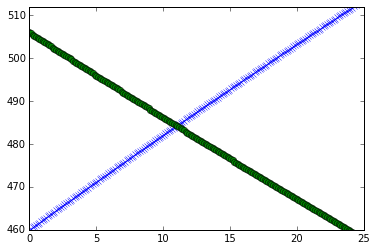

In [3]:
t = linspace(0,25,200)
tau = 250
x1 = 1023 - 563*exp(-(t)/tau)
x2 = 506*exp(-(t)/tau)
plot(t,x1,'x',t,x2,'o')
axis([0,25,460,512])